In [41]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import time

## Training Models

### Linear Regression

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [86]:
# known parameters
weight = 2
bias = 3

# generate data using known parameters, we will try and learn these parameters during training
X = 10*torch.randn(size=(1000,1), device=device)
y = weight * X**2 + bias
noise = 100*torch.randn(size=(1000,1), device=device)
y = y + noise

In [87]:
# create training and testing splits
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), X_train, y_train

(800,
 800,
 200,
 200,
 tensor([[-2.7177e-02],
         [ 3.9851e+00],
         [ 1.7644e+01],
         [ 6.2976e+00],
         [-7.7353e+00],
         [-3.6868e+00],
         [ 2.2658e+01],
         [ 2.5675e+00],
         [-5.6678e+00],
         [-3.1562e+00],
         [-3.7611e+00],
         [ 1.4261e+00],
         [ 2.3253e+00],
         [-1.0132e+01],
         [ 1.2620e+01],
         [ 6.6724e+00],
         [ 4.8164e+00],
         [ 1.0665e+01],
         [-1.3557e+01],
         [ 2.1973e+00],
         [ 7.2082e+00],
         [-1.1662e+00],
         [-1.0607e+01],
         [-7.6479e+00],
         [-8.0496e-01],
         [ 9.7785e+00],
         [-2.8324e+00],
         [-1.5591e+01],
         [ 1.1838e+01],
         [ 4.4084e+00],
         [ 8.6999e+00],
         [ 1.8489e+01],
         [-9.0028e+00],
         [-3.9905e+00],
         [-8.1043e+00],
         [-1.3314e+00],
         [ 1.4125e+01],
         [-1.8904e+01],
         [ 9.5016e+00],
         [-4.8648e+00],
         [-8.420

In [96]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training Data")
    
    # plot test data in red
    plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c='r', s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    
    plt.show()

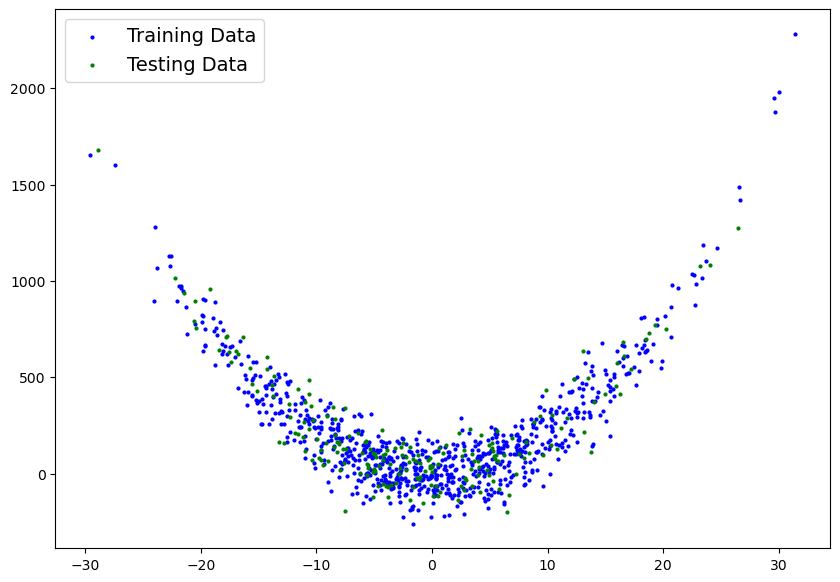

In [97]:
plot_predictions(X_train, y_train, X_test, y_test)

In [98]:
def shuffle(data, labels):
    seed = int(time.time())
    np.random.seed(seed)
    
    for i in range(len(data)):
        
        idx_one = np.random.randint(low=0, high=len(data))
        idx_two = np.random.randint(low=0, high=len(data))
        
        temp_data = data[idx_one][0].item()
        temp_label = labels[idx_one][0].item()
        
        data[idx_one][0] = data[idx_two][0]
        labels[idx_one][0] = labels[idx_two][0]
        
        data[idx_two][0] = temp_data
        labels[idx_two][0] = temp_label        

In [99]:
def h_theta(x, params):
    return params[0] + params[1]*x

In [100]:
# cost function = (1/2)* sum(h(x_i)-y_i)^2

def gradient_descent(data, labels, weight, bias, lr, num_batches):
    
    shuffle(data,labels)
    
    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        weight_grad = 0
        bias_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta(x.item(),(bias, weight))
            weight_grad += (pred-y.item())*(x.item())
            bias_grad += (pred-y.item())    

        weight = weight - lr*(weight_grad/len(data_minibatch))
        bias = bias - lr*(bias_grad/len(data_minibatch))
        
    return weight, bias

In [101]:
for epoch in range(100):
    weight, bias = gradient_descent(X_train, y_train, 1, 1, 0.01, 8)
    if(epoch % 20 == 0):
        print(f"epoch {epoch}: weight = {weight}, bias = {bias}")

epoch 0: weight = -2.285959618905393, bias = 17.59099366007298
epoch 20: weight = 6.664649014764652, bias = 17.488959012333805
epoch 40: weight = 13.989156067564474, bias = 17.310791837043713
epoch 60: weight = 2.5686887356897348, bias = 17.286241353883035
epoch 80: weight = -5.576925206255457, bias = 17.37654115666237


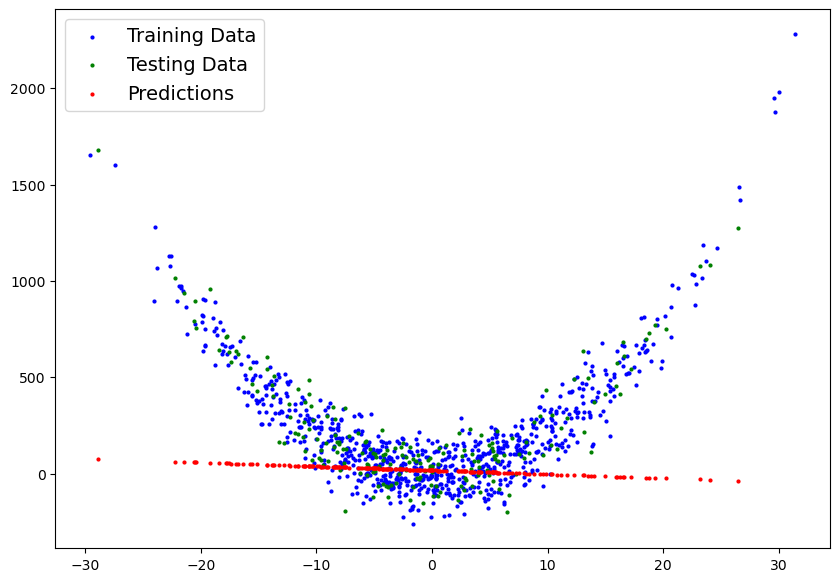

In [102]:
plot_predictions(X_train, y_train, X_test, y_test, h_theta(X_test, [bias, weight]))

### Polynomial Regression

epoch 0: theta1 = -306.43714094768944, theta2 = -2.432041336174841, theta3 = -0.8038971624100664
epoch 20: theta1 = -9.755328146081007e+47, theta2 = 5.462197338821804e+46, theta3 = -3.508978403258666e+45
epoch 40: theta1 = -1.9157680342358126e+93, theta2 = 5.2939838121540395e+91, theta3 = -6.003264442258705e+90
epoch 60: theta1 = -1.0957607602355343e+139, theta2 = -5.248028927435325e+137, theta3 = -6.787714781471809e+136
epoch 80: theta1 = -7.833434523505724e+185, theta2 = 7.855276329441096e+183, theta3 = -3.591176078684276e+183


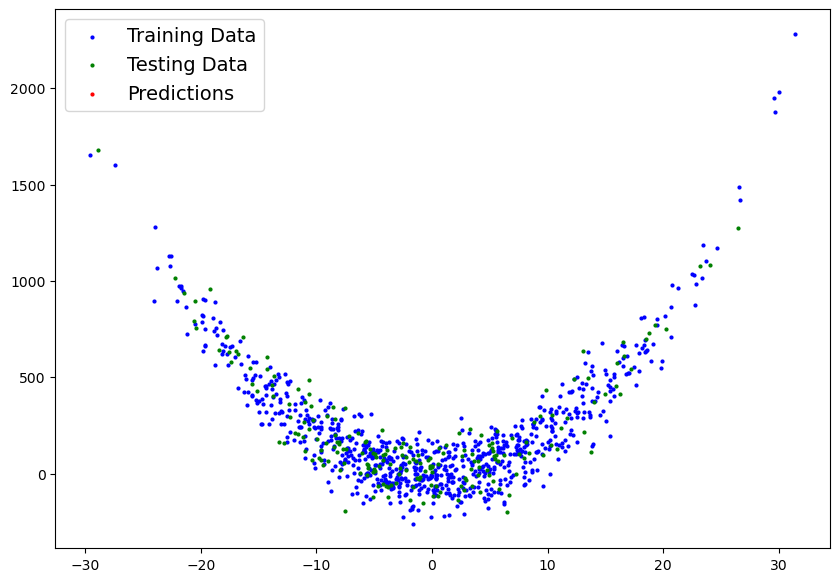

In [106]:
def h_theta_poly(x, params):
    return params[0]*(x**2) + params[1]*x + params[2]

def gradient_descent(data, labels, params, lr, num_batches):
    
    shuffle(data,labels)
    
    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        theta1_grad = 0
        theta2_grad = 0
        theta3_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta_poly(x.item(),params)
            theta1_grad += (pred-y.item())*(x.item()**2)
            theta2_grad += (pred-y.item())*(x.item())
            theta3_grad += (pred-y.item())

        params[0] = params[0] - lr*(theta1_grad/len(data_minibatch))
        params[1] = params[1] - lr*(theta2_grad/len(data_minibatch))
        params[2] = params[2] - lr*(theta3_grad/len(data_minibatch))        

    return params

params = [1,1,1]
for epoch in range(100):
    params = gradient_descent(X_train, y_train, params, 0.0001, 8)
    if(epoch % 20 == 0):
        print(f"epoch {epoch}: theta1 = {params[0]}, theta2 = {params[1]}, theta3 = {params[2]}")

plot_predictions(X_train, y_train, X_test, y_test, h_theta_poly(X_test, params))

In [36]:
# data
x = np.arange(0,50,0.2)
x = x.reshape(len(x),1)
y = 2*x + 3 + 200*np.random.randn(len(x),1)

#parameters
w = 1.0
b = 1.0
lr = 0.0001
N = len(x)

# gradient descent algorithm
def descent(x, y, w, b, lr):
    
    w_grad = 0.0
    b_grad = 0.0

    for xi, yi in zip(x,y):
        w_grad += (xi)*((w*(xi)+b) - yi)
        b_grad += -(yi - (w*(xi**2)+b))
    
    w = w - lr*(2/N)*w_grad
    b = b - lr*(2/N)*b_grad

    return w, b

# iteratively make updates
for epoch in range(400):
    w, b = descent(x,y,w,b,lr)
    
    if(epoch % 100 == 0):    
        y_hat = w*(x**2) + b
        loss = np.divide(np.sum((y-y_hat)**2, axis=0), N)
        print(f"epoch {epoch}: w = {w}, b = {b}, loss = {loss}")

epoch 0: w = [0.99985442], b = [0.84012968], loss = [1225189.99163548]
epoch 100: w = [1.55606136], b = [-18.98366253], loss = [2903978.43731937]
epoch 200: w = [2.4763252], b = [-50.45598408], loss = [7289808.02969897]
epoch 300: w = [3.93897569], b = [-100.47751522], loss = [18380432.90384215]
